#**Задача 1.3**
Проанализировать консервативность $Z-$критерия для корреляции Пирсона в зависимости от:

* Мощности выборки
* Проверяемого значения коэффициента корреляции

Напоминание (об этом говорилось на лекции): $Z-$тест позволяет проверять не только соответствие корреляции нулю, но и производить сопоставление с произвольным значением корреляции.



---

#Решение
Небольшая вырезка из семинара:
Рассмотрим задачу нахождения корреляции Пирсона для двух случайных величин:

$$X_1 \sim N(0,1), \hspace{0,5cm} X_2 = X_1 + \alpha \varepsilon, \hspace{0,3cm} \varepsilon \sim N(0,1)$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.stats as st
import seaborn as sns

import statsmodels.api as sm

In [2]:
n = 10

alpha = 0.5
mean1 = mean2 = 0
disp1 =  1
disp2 =  1 + alpha**2
corr = 1.0/np.sqrt(disp2)

print(corr, disp2)

0.8944271909999159 1.25


In [19]:
noises = np.array([0.1] + np.arange(0.5, 10.0, 0.5).tolist())

def test_noise(n=10, noises=np.array([0.1] + np.arange(0.5, 10.0, 0.5).tolist())):
  pow_zs = []
  corrs = []
  for noise in noises:    
      results_z = []
      corr = 1.0/np.sqrt(1+noise**2)
      corrs.append(corr)
      for _ in range(1000):
          data1 = np.random.randn(n)
          data2 = data1 + noise*np.random.randn(n)
        
          pearson = st.pearsonr(data1, data2)[0]
          if pearson == 1.:
              pearson = 0.99999

          Z = (np.arctanh(pearson) - np.arctanh(corr)*np.sqrt(n-3)) #sigma = 1
          z_pval = 2*(1 - st.distributions.norm.cdf(abs(Z)))

          z_res = z_pval<0.05
          #zs.append(z_pval)
          results_z.append(z_res)
      pow_zs.append(np.mean(results_z))
  plt.plot(corrs, pow_zs)
  plt.plot(corrs, [0.05]*len(corrs), label='y=0.05')
  plt.legend()
  plt.xlabel('Корреляция')
  plt.ylabel('Истинная ошибка первого рода')
  plt.title("Зависимость истинной ошибки 1 рода от \nпроверяемого значения корреляции при мощности n={}".format(n))
  plt.show()

        
#print(noise, ':', corr, np.mean(results_z))

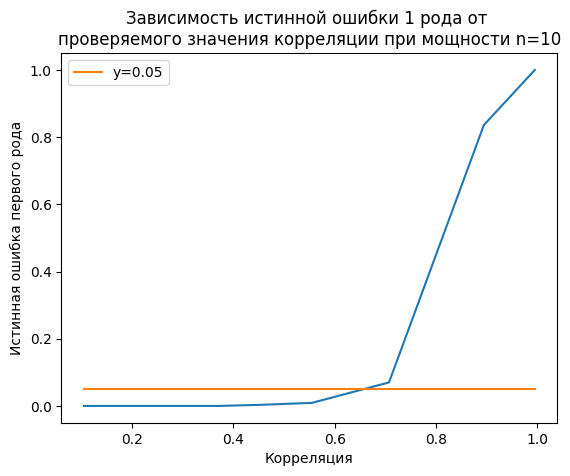

In [20]:
test_noise()

По графику видно, что наш тест консервативен, при  значении корреляции $\leq 0.65$

In [1]:
def test_n(ns=np.arange(10, 100, 5).tolist(), noise=3):
  pow_zs = []
  for n in ns:    
      results_z = []
      corr = 1.0/np.sqrt(1+noise**2)
      #corrs.append(corr)
      for _ in range(1000):
          data1 = np.random.randn(n)
          data2 = data1 + noise*np.random.randn(n)
        
          pearson = st.pearsonr(data1, data2)[0]
          if pearson == 1.:
              pearson = 0.99999

          Z = (np.arctanh(pearson) - np.arctanh(corr)*np.sqrt(n-3)) #sigma = 1
          z_pval = 2*(1 - st.distributions.norm.cdf(abs(Z)))

          z_res = z_pval<0.05
          #zs.append(z_pval)
          results_z.append(z_res)
      pow_zs.append(np.mean(results_z))
  plt.plot(ns, pow_zs)
  plt.plot(ns, [0.05]*len(ns), label='y=0.05')
  plt.legend()
  plt.xlabel('Мощность выборки n')
  plt.ylabel('Истинная ошибка первого рода')
  plt.title("Зависимость истинной ошибки 1 рода от \nот n при alpha ={}".format(noise))
  plt.show()

NameError: ignored

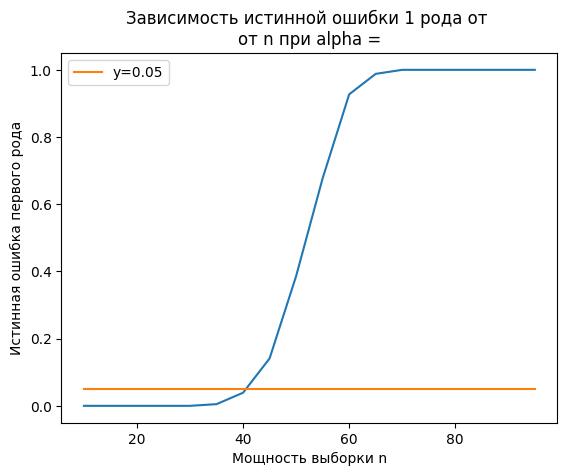

In [28]:
test_n()